In [13]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/cammesa/maximos_historicos.csv')
df.head()

,AÑO,MES,N° MES,VERANO / INVIERNO,SEMANA,FECHA,TIPO DIA,DIA,N° DIA,Energía SADI (GWh),Potencia Pico SADI (MW),Hora Potencia Pico,Temperatura Media Diaria GBA (°C),Estado del Tiempo [Claro/Nublado/Seminublado]
0,2007,ene-07,1,VERANO,1,1/1/2007,FERIADO,Lunes,1,"277,6","14157,0","21,5","29,2",C
1,2007,ene-07,1,VERANO,1,1/2/2007,HÁBIL,Martes,2,"325,4","15801,0","21,02","26,0",N
2,2007,ene-07,1,VERANO,1,1/3/2007,HÁBIL,Miércoles,3,"325,5","16136,0","21,11","25,0",N
3,2007,ene-07,1,VERANO,1,1/4/2007,HÁBIL,Jueves,4,"334,0","16782,0","21,16","25,0",N
4,2007,ene-07,1,VERANO,1,1/5/2007,HÁBIL,Viernes,5,"320,3","15321,0","21,23","22,6",C


In [3]:
df_maximos = df[['VERANO / INVIERNO', 'SEMANA', 'FECHA', 'TIPO DIA', 'DIA', 'Energía SADI (GWh)', 'Potencia Pico SADI (MW)', 'Hora Potencia Pico', 'Temperatura Media Diaria GBA  (°C)', 'Estado del Tiempo [Claro/Nublado/Seminublado]']]
df_maximos

,VERANO / INVIERNO,SEMANA,FECHA,TIPO DIA,DIA,Energía SADI (GWh),Potencia Pico SADI (MW),Hora Potencia Pico,Temperatura Media Diaria GBA (°C),Estado del Tiempo [Claro/Nublado/Seminublado]
0,VERANO,1,1/1/2007,FERIADO,Lunes,"277,6","14157,0","21,5","29,2",C
1,VERANO,1,1/2/2007,HÁBIL,Martes,"325,4","15801,0","21,02","26,0",N
2,VERANO,1,1/3/2007,HÁBIL,Miércoles,"325,5","16136,0","21,11","25,0",N
3,VERANO,1,1/4/2007,HÁBIL,Jueves,"334,0","16782,0","21,16","25,0",N
4,VERANO,1,1/5/2007,HÁBIL,Viernes,"320,3","15321,0","21,23","22,6",C
...,...,...,...,...,...,...,...,...,...,...
6001,VERANO,23,6/7/2023,HÁBIL,Miércoles,"399,4","19646,0",21,"18,4",N
6002,VERANO,23,6/8/2023,HÁBIL,Jueves,"391,9","19004,0","20,07","21,8",N
6003,VERANO,23,6/9/2023,HÁBIL,Viernes,"391,8","19758,0",20.49,"18,0",N
6004,VERANO,23,6/10/2023,SÁBADO,Sábado,"405,3","20424,0",20.20,"10,6",N


In [4]:
df_maximos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   VERANO / INVIERNO                              6006 non-null   object
 1   SEMANA                                         6006 non-null   int64 
 2   FECHA                                          6006 non-null   object
 3   TIPO DIA                                       6006 non-null   object
 4   DIA                                            6006 non-null   object
 5   Energía SADI (GWh)                             6006 non-null   object
 6   Potencia Pico SADI (MW)                        6006 non-null   object
 7   Hora Potencia Pico                             6006 non-null   object
 8   Temperatura Media Diaria GBA  (°C)             6006 non-null   object
 9   Estado del Tiempo [Claro/Nublado/Seminublado]  6006 non-null   

In [5]:
df_maximos['Energía SADI (GWh)'] = df_maximos['Energía SADI (GWh)'].str.replace(',', '.').astype(float)
df_maximos['Potencia Pico SADI (MW)'] = df_maximos['Potencia Pico SADI (MW)'].str.replace(',', '.').astype(float)
df_maximos['Temperatura Media Diaria GBA  (°C)'] = df_maximos['Temperatura Media Diaria GBA  (°C)'].str.replace(',', '.').astype(float)

C:\Users\javic\AppData\Local\Temp\ipykernel_9476\1646822360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximos['Energía SADI (GWh)'] = df_maximos['Energía SADI (GWh)'].str.replace(',', '.').astype(float)
C:\Users\javic\AppData\Local\Temp\ipykernel_9476\1646822360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximos['Potencia Pico SADI (MW)'] = df_maximos['Potencia Pico SADI (MW)'].str.replace(',', '.').astype(float)
C:\Users\javic\AppData\Local\Temp\ipykernel_9476\1646822360.py:3: Sett

In [6]:
df_maximos[df_maximos['Hora Potencia Pico'].str.len() > 5]

,VERANO / INVIERNO,SEMANA,FECHA,TIPO DIA,DIA,Energía SADI (GWh),Potencia Pico SADI (MW),Hora Potencia Pico,Temperatura Media Diaria GBA (°C),Estado del Tiempo [Claro/Nublado/Seminublado]
5361,INVIERNO,35,9/5/2021,DOMINGO,Domingo,330.0,17248.0,"210,50",14.7,N


In [7]:
df_maximos[df_maximos['Hora Potencia Pico'].str.len() < 5]

,VERANO / INVIERNO,SEMANA,FECHA,TIPO DIA,DIA,Energía SADI (GWh),Potencia Pico SADI (MW),Hora Potencia Pico,Temperatura Media Diaria GBA (°C),Estado del Tiempo [Claro/Nublado/Seminublado]
0,VERANO,1,1/1/2007,FERIADO,Lunes,277.6,14157.0,"21,5",29.2,C
32,VERANO,5,2/2/2007,HÁBIL,Viernes,355.6,17517.0,"21,2",28.6,C
58,VERANO,9,2/28/2007,HÁBIL,Miércoles,319.3,16442.0,"20,5",21.0,N
278,VERANO,40,10/6/2007,SÁBADO,Sábado,273.2,14360.0,"20,4",19.5,SN
352,VERANO,51,12/19/2007,HÁBIL,Miércoles,341.7,17010.0,"21,1",20.8,C
354,VERANO,51,12/21/2007,HÁBIL,Viernes,365.8,17490.0,"21,2",29.5,N
363,VERANO,52,12/30/2007,DOMINGO,Domingo,291.8,15956.0,"22,6",27.8,C
364,VERANO,53,12/31/2007,HÁBIL,Lunes,315.7,14534.0,"22,2",31.0,C
365,VERANO,1,1/1/2008,FERIADO,Martes,283.9,14548.0,"22,5",28.1,C
392,VERANO,5,1/28/2008,HÁBIL,Lunes,317.5,15531.0,"21,5",23.5,N


In [8]:
def format_time(value):
    try:
        value = value.replace(',', '.')
        time_obj = datetime.strptime(value, '%H.%M')
        return time_obj.strftime('%H:%M')
    except:
        return None

df_maximos['hora_formateada'] = df_maximos['Hora Potencia Pico'].apply(format_time)

C:\Users\javic\AppData\Local\Temp\ipykernel_9476\1340745039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximos['hora_formateada'] = df_maximos['Hora Potencia Pico'].apply(format_time)


In [9]:
def combine_date_time(row):
    try:
        fecha_obj = datetime.strptime(row['FECHA'], '%d/%m/%Y')
        hora_obj = datetime.strptime(row['hora_formateada'], '%H:%M')
        combined_datetime = fecha_obj.replace(hour=hora_obj.hour, minute=hora_obj.minute)
        return combined_datetime
    except:
        return None

df_maximos['fecha_completa'] = df_maximos.apply(combine_date_time, axis=1)

C:\Users\javic\AppData\Local\Temp\ipykernel_9476\495001734.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maximos['fecha_completa'] = df_maximos.apply(combine_date_time, axis=1)


In [10]:
df_maximos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6006 entries, 0 to 6005
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   VERANO / INVIERNO                              6006 non-null   object        
 1   SEMANA                                         6006 non-null   int64         
 2   FECHA                                          6006 non-null   object        
 3   TIPO DIA                                       6006 non-null   object        
 4   DIA                                            6006 non-null   object        
 5   Energía SADI (GWh)                             6006 non-null   float64       
 6   Potencia Pico SADI (MW)                        6006 non-null   float64       
 7   Hora Potencia Pico                             6006 non-null   object        
 8   Temperatura Media Diaria GBA  (°C)             6006 non-nu

In [11]:
df_maximos = df_maximos[['VERANO / INVIERNO', 'SEMANA', 'TIPO DIA', 'DIA', 'Energía SADI (GWh)', 'Potencia Pico SADI (MW)', 'Temperatura Media Diaria GBA  (°C)', 'Estado del Tiempo [Claro/Nublado/Seminublado]', 'fecha_completa']]
df_maximos

,VERANO / INVIERNO,SEMANA,TIPO DIA,DIA,Energía SADI (GWh),Potencia Pico SADI (MW),Temperatura Media Diaria GBA (°C),Estado del Tiempo [Claro/Nublado/Seminublado],fecha_completa
0,VERANO,1,FERIADO,Lunes,277.6,14157.0,29.2,C,2007-01-01 21:05:00
1,VERANO,1,HÁBIL,Martes,325.4,15801.0,26.0,N,2007-02-01 21:02:00
2,VERANO,1,HÁBIL,Miércoles,325.5,16136.0,25.0,N,2007-03-01 21:11:00
3,VERANO,1,HÁBIL,Jueves,334.0,16782.0,25.0,N,2007-04-01 21:16:00
4,VERANO,1,HÁBIL,Viernes,320.3,15321.0,22.6,C,2007-05-01 21:23:00
...,...,...,...,...,...,...,...,...,...
6001,VERANO,23,HÁBIL,Miércoles,399.4,19646.0,18.4,N,NaT
6002,VERANO,23,HÁBIL,Jueves,391.9,19004.0,21.8,N,2023-08-06 20:07:00
6003,VERANO,23,HÁBIL,Viernes,391.8,19758.0,18.0,N,2023-09-06 20:49:00
6004,VERANO,23,SÁBADO,Sábado,405.3,20424.0,10.6,N,2023-10-06 20:20:00


In [12]:
df_maximos = df_maximos.rename(columns={
    'VERANO / INVIERNO': 'temporada',
    'TIPO DIA': 'tipo_dia',
    'Energía SADI (GWh)': 'energia_sadi',
    'Potencia Pico SADI (MW)': 'potencia_pico_sadi',
    'Temperatura Media Diaria GBA  (°C)': 'temp_media_diaria_gba',
    'Estado del Tiempo [Claro/Nublado/Seminublado]': 'estado_tiempo',
    'fecha_completa': 'fecha_potencia_pico',
    'SEMANA': 'semana',
    'DIA': 'dia'
})
df_maximos

,temporada,semana,tipo_dia,dia,energia_sadi,potencia_pico_sadi,temp_media_diaria_gba,estado_tiempo,fecha_potencia_pico
0,VERANO,1,FERIADO,Lunes,277.6,14157.0,29.2,C,2007-01-01 21:05:00
1,VERANO,1,HÁBIL,Martes,325.4,15801.0,26.0,N,2007-02-01 21:02:00
2,VERANO,1,HÁBIL,Miércoles,325.5,16136.0,25.0,N,2007-03-01 21:11:00
3,VERANO,1,HÁBIL,Jueves,334.0,16782.0,25.0,N,2007-04-01 21:16:00
4,VERANO,1,HÁBIL,Viernes,320.3,15321.0,22.6,C,2007-05-01 21:23:00
...,...,...,...,...,...,...,...,...,...
6001,VERANO,23,HÁBIL,Miércoles,399.4,19646.0,18.4,N,NaT
6002,VERANO,23,HÁBIL,Jueves,391.9,19004.0,21.8,N,2023-08-06 20:07:00
6003,VERANO,23,HÁBIL,Viernes,391.8,19758.0,18.0,N,2023-09-06 20:49:00
6004,VERANO,23,SÁBADO,Sábado,405.3,20424.0,10.6,N,2023-10-06 20:20:00


In [52]:
# Formateo valores del estado del tiempo para eliminar espacios
df_maximos["estado_tiempo"] = df_maximos["estado_tiempo"].str.strip()

C:\Users\javic\Documents\GitHub\Contar-Con-Datos-2023\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


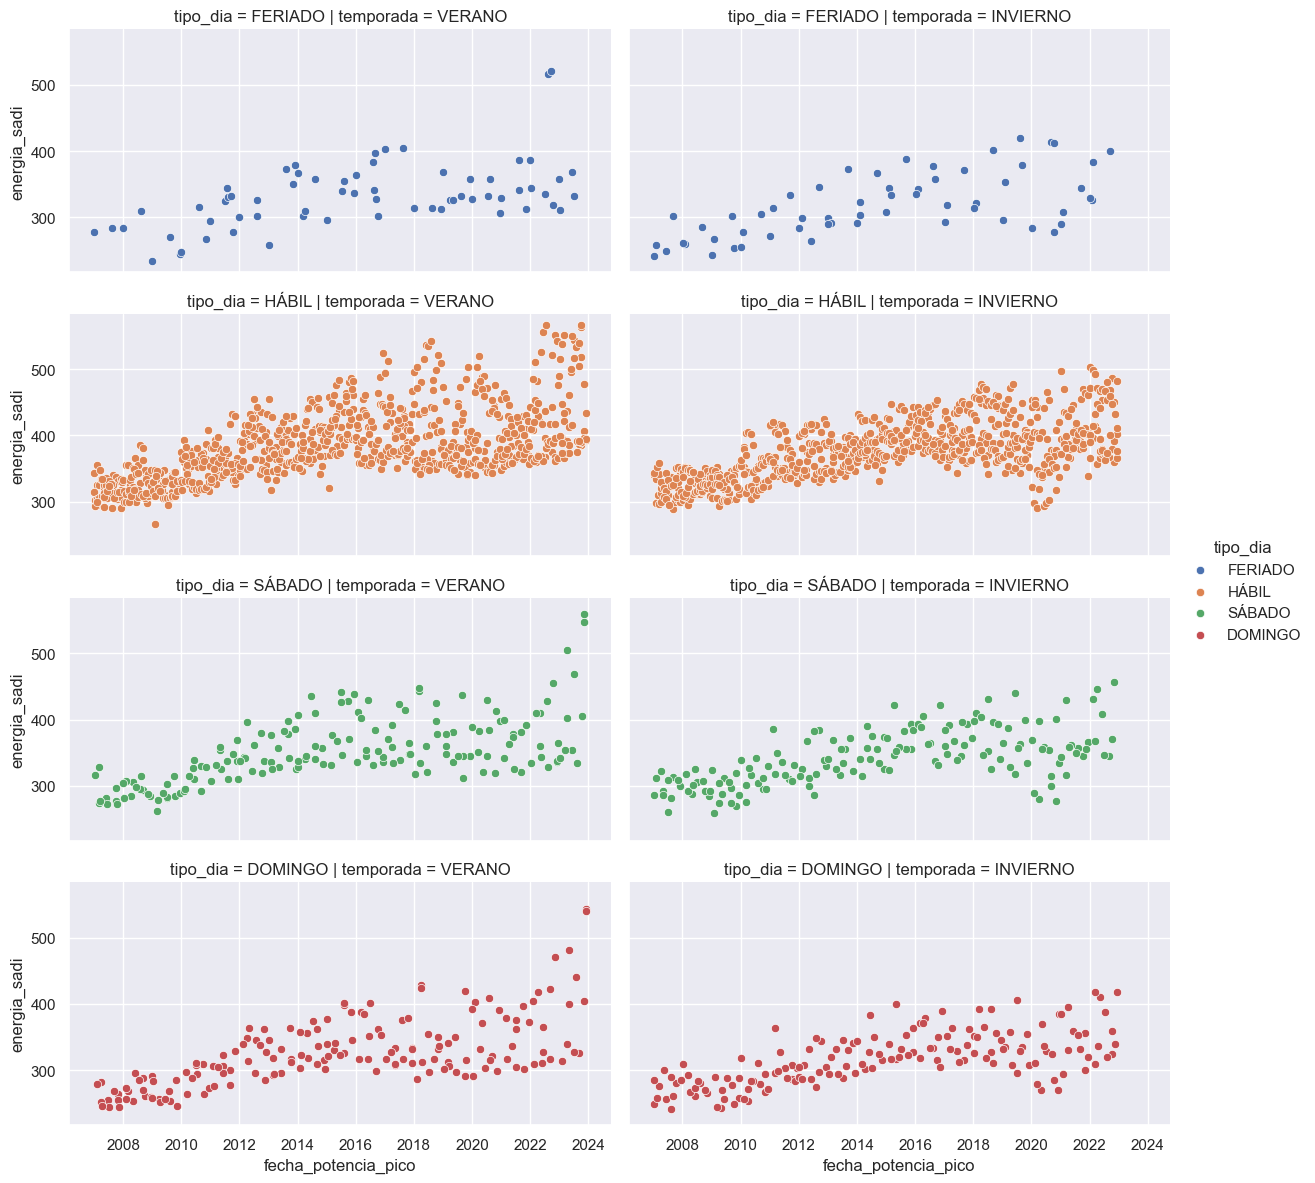

In [42]:
grid = sns.FacetGrid(data=df_maximos, col="temporada", row="tipo_dia", hue="tipo_dia", aspect=2)
grid.map(sns.scatterplot, 'fecha_potencia_pico', 'energia_sadi')
grid.add_legend()
plt.show()

C:\Users\javic\Documents\GitHub\Contar-Con-Datos-2023\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


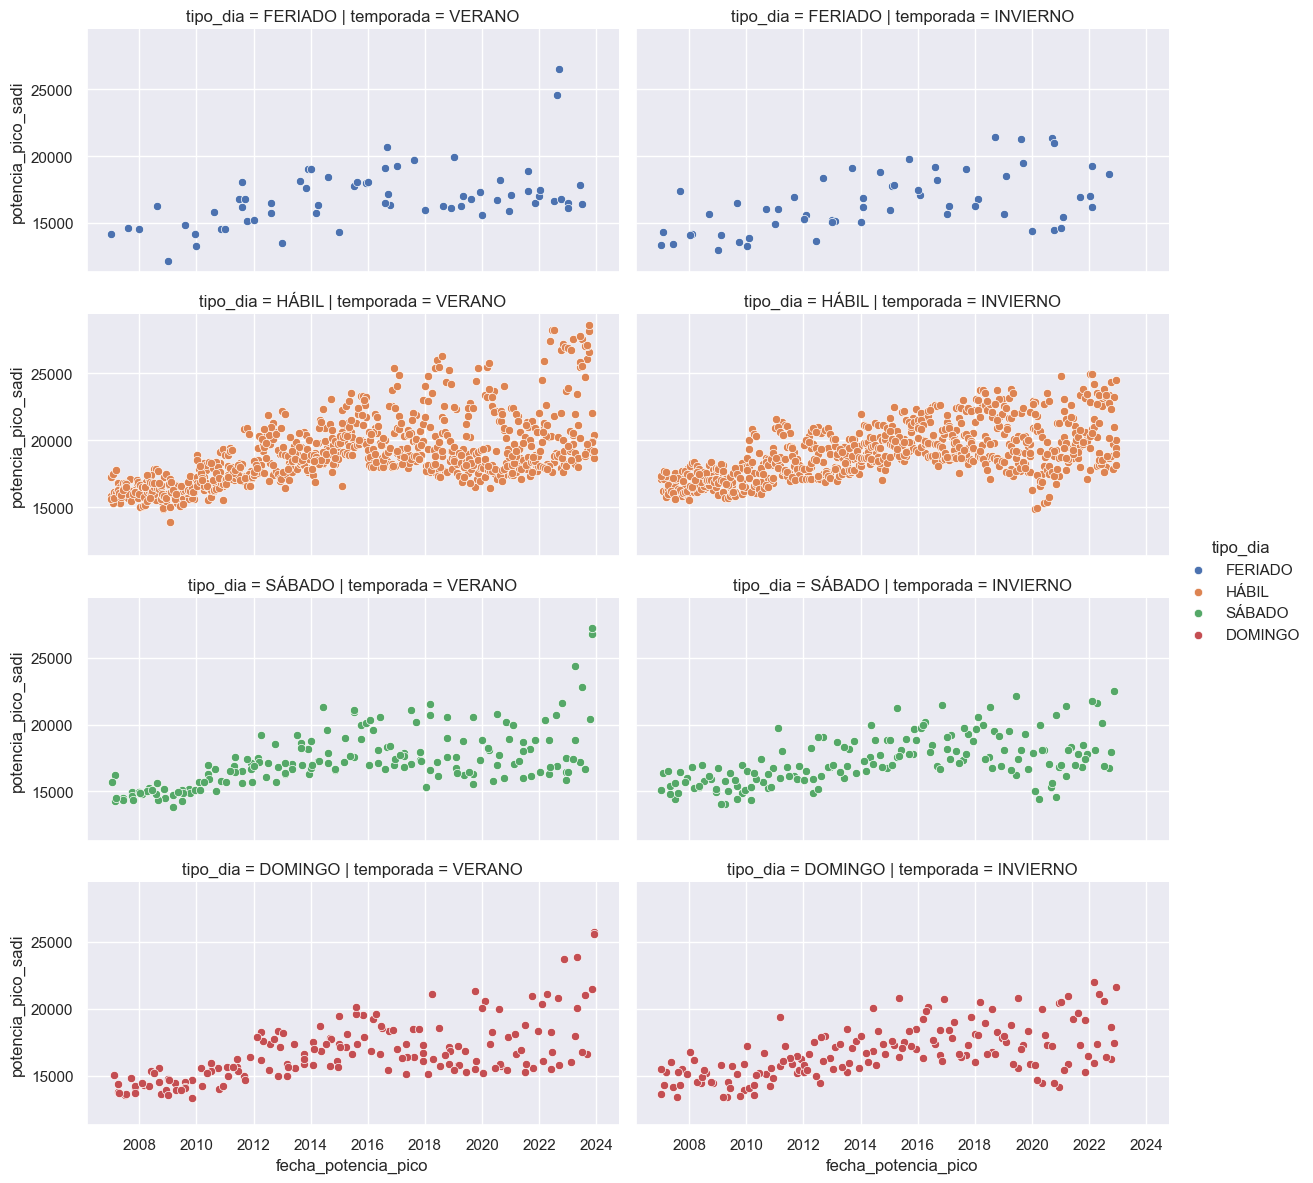

In [44]:
grid = sns.FacetGrid(data=df_maximos, col="temporada", hue="tipo_dia", row="tipo_dia", aspect=2)
grid.map(sns.scatterplot, 'fecha_potencia_pico', 'potencia_pico_sadi')
grid.add_legend()
plt.show()

C:\Users\javic\Documents\GitHub\Contar-Con-Datos-2023\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


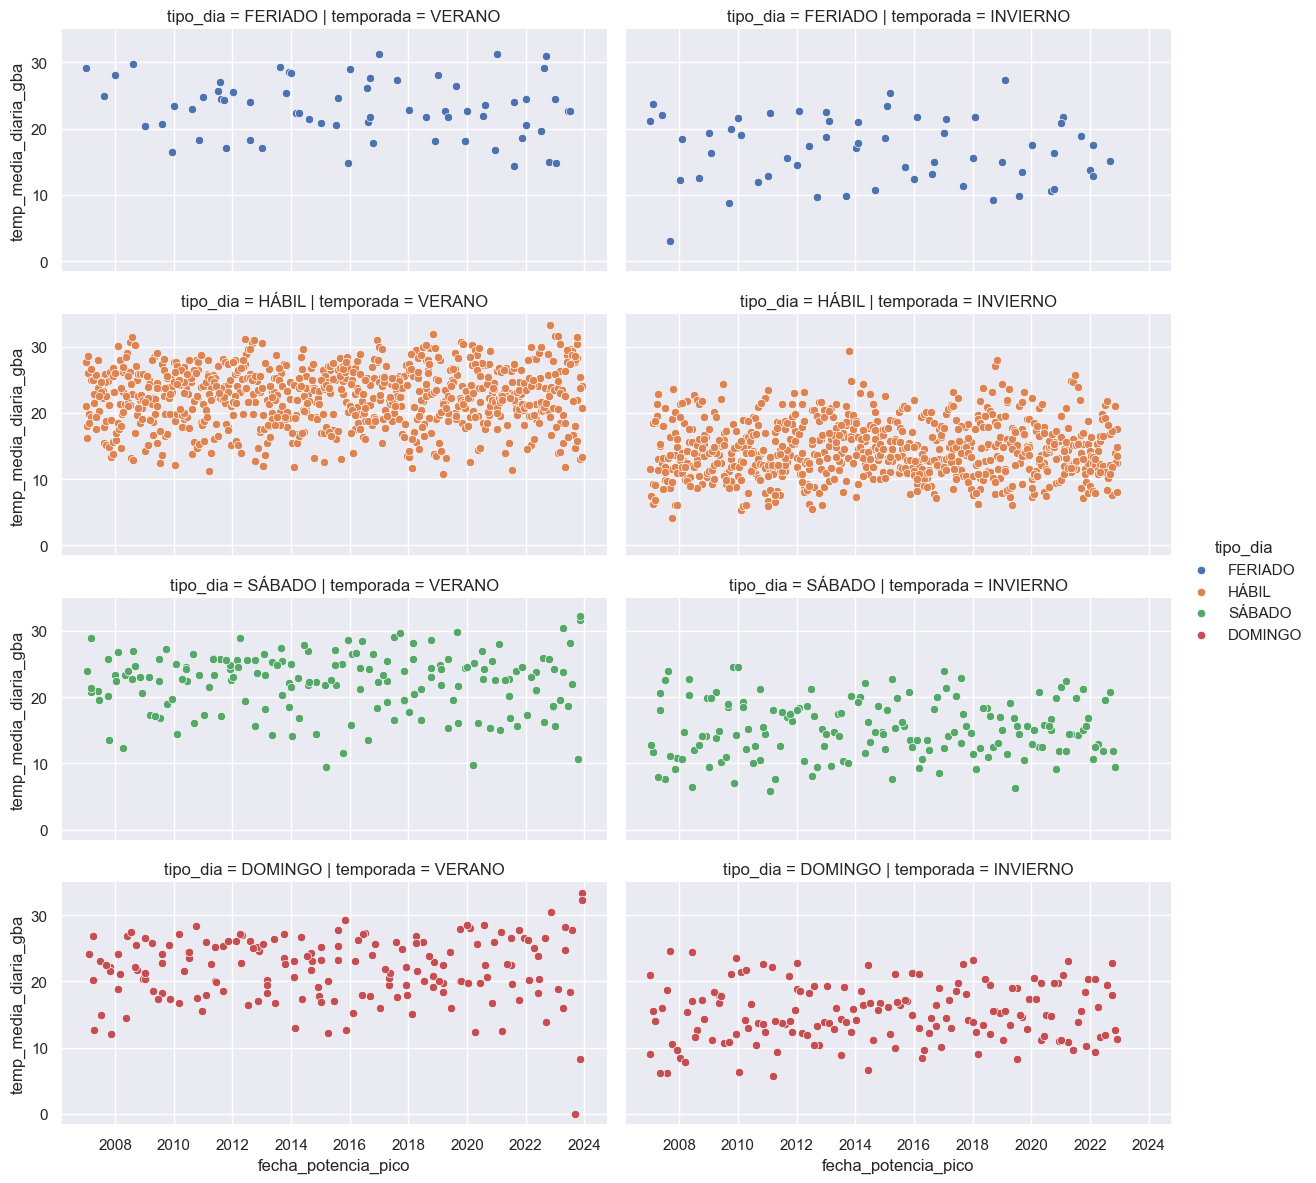

In [45]:
grid = sns.FacetGrid(data=df_maximos, col="temporada", row="tipo_dia", hue="tipo_dia", aspect=2)
grid.map(sns.scatterplot, 'fecha_potencia_pico', 'temp_media_diaria_gba')
grid.add_legend()
plt.show()

C:\Users\javic\Documents\GitHub\Contar-Con-Datos-2023\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


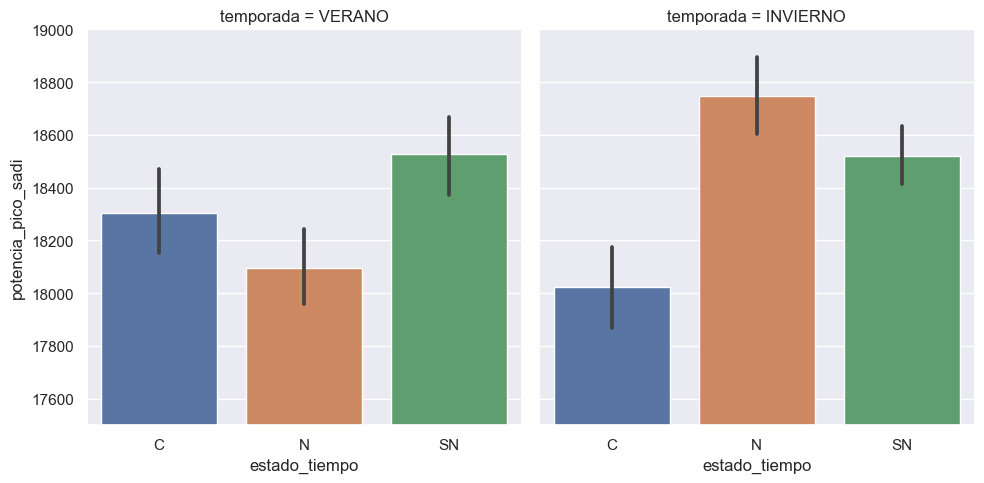

In [79]:
sns.catplot(data=df_maximos, kind="bar", col="temporada", x="estado_tiempo", y="potencia_pico_sadi")
plt.ylim(17500, 19000);